In [8]:
import numpy as np
import networkx as nx
from collections import deque

In [225]:
input = """#.#####################
#.......#########...###
#######.#########.#.###
###.....#.>.>.###.#.###
###v#####.#v#.###.#.###
###.>...#.#.#.....#...#
###v###.#.#.#########.#
###...#.#.#.......#...#
#####.#.#.#######.#.###
#.....#.#.#.......#...#
#.#####.#.#.#########v#
#.#...#...#...###...>.#
#.#.#v#######v###.###v#
#...#.>.#...>.>.#.###.#
#####v#.#.###v#.#.###.#
#.....#...#...#.#.#...#
#.#########.###.#.#.###
#...###...#...#...#.###
###.###.#.###v#####v###
#...#...#.#.>.>.#.>.###
#.###.###.#.###.#.#v###
#.....###...###...#...#
#####################.#"""

In [240]:
input = """#.###########################################################################################################################################
#...#.........#...#.......#.....###.........#.....#...#...#...###...#...........#.....#.....#.......#...###...#...###.......###.........#...#
###.#.#######.#.#.#.#####.#.###.###.#######.#.###.#.#.#.#.#.#.###.#.#.#########.#.###.#.###.#.#####.#.#.###.#.#.#.###.#####.###.#######.#.#.#
###.#.#.......#.#.#.....#.#...#.###.#.......#...#...#...#.#.#.###.#.#.....#.....#...#.#.#...#...#...#.#.#...#.#.#...#.....#...#.#.......#.#.#
###.#.#.#######.#.#####.#.###.#.###.#.#########.#########.#.#.###.#.#####.#.#######.#.#.#.#####.#.###.#.#.###.#.###.#####.###.#.#.#######.#.#
#...#.#...#...#.#.#...#.#.#...#.#...#.#.>.>.###.#.........#.#.....#.....#.#.#...###.#.#.#...###.#.###.#.#...#.#...#...###.#...#.#.....#...#.#
#.###.###.#.#.#.#.#.#.#.#.#.###.#.###.#.#v#.###.#.#########.###########.#.#.#.#.###.#.#.###.###.#.###.#.###.#.###.###.###.#.###.#####.#.###.#
#.....#...#.#.#.#.#.#.#.#.#...#...#...#.#.#.....#...#.....#.....#.......#.#.#.#.#...#.#...#...#.#...#.#...#.#...#...#.....#.....#.....#.#...#
#######v###.#.#.#.#.#.#.#.###.#####.###.#.#########.#.###.#####.#.#######.#.#.#.#.###.###.###.#.###.#.###.#.###.###.#############.#####.#.###
###...#.>.#.#.#.#...#.#.#...#.....#...#.#.....#.....#.#...###...#.......#.#...#.#...#...#...#.#.#...#...#.#.#...#...#.............#...#.#.###
###.#.#v#.#.#.#.#####.#.###.#####.###.#.#####.#.#####.#.#####.#########.#.#####.###.###.###.#.#.#.#####.#.#.#.###.###.#############.#.#.#.###
#...#...#.#.#.#...#...#.###...#...###...#.....#.....#.#.>.>...#.........#.....#.###...#.....#...#...#...#...#...#...#.#...#...#...#.#.#.#.###
#.#######.#.#.###.#.###.#####.#.#########.#########.#.###v#####.#############.#.#####.#############.#.#########.###.#.#.#.#.#.#.#.#.#.#.#.###
#.#.....#...#.#...#.....###...#.#.......#.........#.#.###...###.....#.....#...#.....#...#...........#.......#...###.#.#.#...#.#.#.#.#...#...#
#.#.###.#####.#.###########.###.#.#####.#########.#.#.#####.#######.#.###.#.#######.###.#.#################.#.#####.#.#.#####.#.#.#.#######.#
#...###...#...#.......#...#...#.#.#...#...#...#...#.#.#...#...#.....#...#.#...#.....#...#.....#.....#...#...#.>.>.#.#.#.#.....#.#.#.#.......#
#########.#.#########.#.#.###.#.#.#.#.###.#.#.#.###.#.#.#.###.#.#######.#.###.#.#####.#######.#.###.#.#.#.#####v#.#.#.#.#.#####.#.#.#.#######
#.........#...#.....#.#.#.....#.#...#...#...#...###...#.#.###.#.#...#...#.....#...>.>.#.....#.#.###.#.#...###...#...#.#.#.......#...#.......#
#.###########.#.###.#.#.#######.#######.###############.#.###.#.#.#.#.#############v###.###.#.#.###.#.#######.#######.#.###################.#
#...........#.#...#.#.#...#...#.#...###...........#.....#.....#...#.#...#...........###...#.#.#.#...#.#...#...#...###.#.###.................#
###########.#.###.#.#.###.#.#.#.#.#.#############.#.###############.###.#.###############.#.#.#.#.###.#.#.#.###.#.###.#.###.#################
#...........#.....#.#.#...#.#.#.#.#.............#.#...............#.#...#.#...#.........#.#.#...#...#...#.#.....#...#.#.#...#.......#.......#
#.#################.#.#.###.#.#.#.#############.#.###############.#.#.###.#.#.#.#######.#.#.#######.#####.#########.#.#.#.###.#####.#.#####.#
#.#...............#...#.....#.#.#.......#...###...#...............#...###...#.#.#.......#.#...#...#.......###...#...#.#.#...#.#.....#.#.....#
#.#.#############.###########.#.#######.#.#.#######.#########################.#.#.#######.###.#.#.###########.#.#.###.#.###.#.#.#####.#.#####
#...#.............#...#...###.#.###...#...#.......#.......................###...#.....#...#...#.#.#...#.....#.#.#.###...###...#.#...#.#.....#
#####.#############.#.#.#.###.#.###.#.###########.#######################.###########.#.###.###.#.#.#.#.###.#.#.#.#############.#.#.#.#####.#
#...#...#...........#.#.#.###...#...#.............#...###.......#...#...#.#...........#...#.###.#.#.#.#.#...#.#.#.#...###...###...#...#.....#
#.#.###.#.###########.#.#.#######.#################.#.###.#####.#.#.#.#.#.#.#############.#.###.#.#.#.#.#.###.#.#v#.#.###.#.###########v#####
#.#...#...#...#.......#.#...#.....#.................#...#.....#...#...#...#.#...#...#.....#...#.#.#.#.#.#.#...#.>.>.#.#...#...#.....#.>.#####
#.###.#####.#.#.#######.###.#.#####.###################.#####.#############.#.#.#.#.#.#######.#.#.#.#.#.#.#.#####v###.#.#####.#.###.#.#v#####
#...#.......#.#...#...#...#.#.....#.#...................#####...#...#...###...#...#.#...###...#.#.#.#.#.#.#.#...#.###...#####.#.###...#.....#
###.#########.###.#.#.###.#.#####.#.#.#########################.#.#.#.#.###########.###.###.###.#.#.#.#.#.#.#.#.#.###########.#.###########.#
#...#...#...#.....#.#.###.#.#...#...#.........#...#...###.......#.#.#.#...###...#...###...#.#...#.#.#...#...#.#.#.........#...#.###.........#
#.###.#v#.#.#######.#.###.#.#.#.#############.#.#.#.#.###.#######.#.#.###.###.#.#.#######.#.#.###.#.#########.#.#########.#.###.###.#########
#...#.#.>.#...###...#...#.#.#.#...#...#...#...#.#.#.#...#.......#.#.#...#.###.#.#...#.....#...###...###...#...#...#...#...#.....#...#...#...#
###.#.#v#####.###.#####.#.#.#.###.#.#.#.#.#.###.#.#.###.#######.#.#.###.#.###.#.###v#.#################.#.#.#####.#.#.#.#########.###.#.#.#.#
#...#.#...###...#...#...#.#.#.#...#.#.#.#.#.###.#.#.#...#...#...#.#...#.#.#...#.#.>.>.###.......#...#...#.#...###...#...#...#...#...#.#...#.#
#.###.###.#####.###.#.###.#.#.#.###.#.#.#.#v###.#.#.#.###.#.#v###.###.#.#.#.###.#.#v#####.#####.#.#.#.###.###.###########.#.#.#.###.#.#####.#
#.....###...###.#...#.#...#.#.#.....#...#.>.>.#.#.#.#.#...#.>.>.#.#...#.#.#.###...#...#...#...#.#.#.#...#.###...........#.#...#...#...#...#.#
###########.###.#.###.#.###.#.#############v#.#.#.#.#.#.#####v#.#.#.###.#.#.#########.#.###.#.#.#.#.###.#.#############.#.#######.#####.#.#.#
#.........#...#.#.#...#.#...#...#...###...#.#.#.#.#.#.#.###...#...#...#.#.#...#.......#.#...#.#.#.#.....#.#...#.........#...#...#.###...#.#.#
#.#######.###.#.#.#.###.#.#####.#.#.###.#.#.#.#.#.#.#.#.###.#########.#.#.###.#.#######.#.###.#.#.#######.#.#.#.###########.#.#.#.###.###.#.#
#...#...#.....#...#.....#.......#.#.#...#...#...#.#.#.#.#...#...#####...#...#.#.#.......#...#...#...#...#...#...#...#...###...#.#.#...###...#
###.#.#.#########################.#.#.###########.#.#.#.#.###.#.###########.#.#.#.#########.#######.#.#.#########.#.#.#.#######.#.#.#########
###...#...............#...#...#...#.#...........#.#.#...#.....#.......#.....#.#.#.#.........#.....#...#...........#...#.#.......#...#...#...#
#####################.#.#.#.#.#.###.###########.#.#.#################.#.#####.#.#.#.#########.###.#####################.#.###########.#.#.#.#
#.....................#.#.#.#.#...#.#...........#.#.#.................#...#...#...#...........#...#...............#...#.#.#...........#...#.#
#.#####################.#.#.#.###.#.#.###########.#.#.###################.#.###################.###.#############.#.#.#.#.#.###############.#
#.#.......#.......###...#...#.....#.#.......#...#...#...................#.#.#...#...#...#.....#...#.#.......#...#...#.#.#...###.............#
#.#.#####.#.#####.###.#############.#######.#.#.#######################.#.#.#.#.#.#.#.#.#.###.###.#.#.#####.#.#.#####.#.#######.#############
#.#.#.....#.#.....#...#...#.....###.#...#...#.#.###...#...#.............#...#.#.#.#...#...###.....#...#...#...#.....#...#.......#.......#...#
#.#.#.#####.#.#####.###.#.#.###.###.#.#.#.###.#.###.#.#.#.#v#################.#.#.#####################.#.#########.#####.#######.#####.#.#.#
#...#.......#.....#.....#...###...#...#...#...#.....#...#.>.>.#...#...#...#...#.#.....#...#.....###...#.#.......#...###...#.......#.....#.#.#
#################.###############.#########.###############v#.#.#.#.#.#.#.#.###.#####.#.#.#.###.###.#.#.#######.#.#####.###.#######.#####.#.#
#.................#...#...........#...#...#...............#.#...#.#.#.#.#.#.#...#...#...#...#...#...#...#.....#...#...#.....###...#.......#.#
#.#################.#.#.###########.#.#.#.###############.#.#####.#.#.#.#.#.#.###.#.#########.###.#######.###.#####.#.#########.#.#########.#
#.........#.........#.#.............#...#...#...........#.#...#...#.#.#.#...#.#...#...#.......###...#.....#...#...#.#.#.....#...#...........#
#########.#.#########.#####################.#.#########.#.###.#.###.#.#.#####.#.#####.#.###########.#.#####.###.#.#.#.#.###.#.###############
#.........#.#.........#...#####...#.........#.........#...#...#...#.#.#...#...#.....#.#...#...#####...###...###.#.#.#.#...#.#...............#
#.#########.#.#########.#.#####.#.#.#################.#####.#####.#.#.###.#.#######.#.###v#.#.###########.#####.#.#.#.###.#.###############.#
#.#...#...#.#.......#...#...#...#...###.......###...#.....#.....#.#.#...#.#.#.......#...>.>.#...#####...#.....#.#.#.#...#.#.#.........#...#.#
#.#.#.#.#.#.#######.#.#####.#.#########.#####.###.#.#####.#####.#.#.###.#.#.#.###########v#####.#####.#.#####.#.#.#.###.#.#.#.#######.#.#.#.#
#...#...#...#.......#.#.....#.....#...#.#.....#...#.#.....#.....#...#...#.#...#...###...#.....#...###.#.###...#.#.#.#...#.#.#.......#.#.#.#.#
#############v#######.#.#########.#.#.#.#.#####.###.#.#####.#########.###.#####.#.###.#.#####.###.###.#.###v###.#.#.#.###.#.#######v#.#.#.#.#
#.......#...#.>.#...#.#.###...#...#.#.#.#...#...###...#...#.....#...#...#.#...#.#...#.#...#...#...#...#...>.>.#.#.#.#...#.#.#.....>.#...#...#
#.#####.#.#.#v#.#.#.#.#.###.#.#v###.#.#.###.#.#########.#.#####.#.#.###.#.#.#.#.###.#.###.#.###.###.#######v#.#.#.#.###.#.#.#.#####v#########
#.....#...#...#...#.#.#...#.#.>.>...#.#...#.#.....#.....#.......#.#...#.#.#.#.#...#...#...#.#...#...#.......#...#.#.###.#.#...#...#.........#
#####.#############.#.###.#.###v#####.###.#.#####.#.#############.###.#.#.#.#.###.#####.###.#.###.###.###########.#.###.#.#####.#.#########.#
#...#.........#...#.#.#...#.#...###...#...#.#...#.#...............#...#...#.#.###...###.....#.....###.......#.....#.###.#...#...#.........#.#
#.#.#########.#.#.#.#.#.###.#.#####.###.###.#.#.#.#################.#######.#.#####.#######################.#.#####.###.###.#.###########.#.#
#.#.#...#.....#.#.#...#...#.#.###...#...###...#.#.#.................###...#.#.#...#.........#.......#.......#.....#...#.#...#.......###...#.#
#.#.#.#.#.#####.#.#######.#.#.###.###.#########.#.#.###################.#.#.#.#.#.#########.#.#####.#.###########.###.#.#.#########.###.###.#
#.#.#.#.#.......#.....###...#...#.#...###.....#...#.................#...#...#...#...#...#...#.....#.#.......#...#.....#...#####...#...#.....#
#.#.#.#.#############.#########.#.#.#####.###.#####################.#.#############.#.#.#.#######.#.#######.#.#.###############.#.###.#######
#.#...#.#.......#.....#.........#...#...#...#.#...#...###...#.....#.#...#...#.....#.#.#.#...#...#.#...#.....#.#.#...###.........#...#...#...#
#.#####.#v#####.#.#####.#############.#.###.#.#.#.#.#.###.#.#.###.#.###.#.#.#.###.#.#.#.###.#.#.#.###.#.#####.#.#.#.###.###########.###.#.#.#
#.....#.#.>...#...#...#.............#.#.#...#.#.#.#.#...#.#...###...###...#...#...#...#.....#.#.#...#.#...#...#...#...#...........#.....#.#.#
#####.#.#v###.#####.#.#############.#.#.#.###.#.#.#.###.#.#####################.#############.#.###.#.###.#.#########.###########.#######.#.#
#.....#...###.#...#.#.###...........#.#.#...#.#.#.#.#...#.....#...#.......#.....###.....#...#.#.....#.#...#...#.......#...#...#...#.......#.#
#.###########.#.#.#.#.###.###########.#.###.#.#.#.#.#.#######v#.#.#.#####.#.#######.###.#.#.#.#######.#.#####.#.#######.#.#.#.#v###.#######.#
#...#.......#...#...#...#.#...#...###.#.....#...#.#.#.....#.>.>.#.#.....#.#.#...###.#...#.#.#.......#.#...#...#.#.....#.#.#.#.>.###...#.....#
###.#.#####.###########.#.#.#.#.#.###.###########.#.#####.#.#v###.#####.#.#v#.#.###.#.###.#.#######.#.###v#.###.#.###.#.#.#.###v#####.#.#####
###...#...#.#...........#...#.#.#...#.......#.....#...#...#.#.###.#...#.#.>.>.#...#.#...#.#...#...#.#.#.>.>.#...#...#...#.#.###...#...#.....#
#######.#.#.#.###############.#.###.#######.#.#######.#.###.#.###.#.#.#.###v#####.#.###.#.###.#.#.#.#.#.#v###.#####.#####.#.#####.#.#######.#
#...#...#...#...#.....#...#...#.#...#...#...#.....#...#.....#...#...#.#...#...###...###.#...#.#.#.#.#.#.#...#...#...#.....#.#.....#...#.....#
#.#.#.#########.#.###.#.#.#.###.#.###.#.#.#######.#.###########.#####.###.###.#########.###.#.#.#.#.#.#.###.###.#.###.#####.#.#######.#.#####
#.#.#.......###.#.#...#.#.#...#.#.#...#.#.......#.#...#.........#...#.....###.........#.#...#...#.#.#.#.###...#...###.#...#.#.#...#...#.....#
#.#.#######.###.#.#.###.#.###v#.#.#.###.#######.#.###.#.#########.#.#################.#.#.#######.#.#.#.#####.#######.#.#.#.#.#.#.#.#######.#
#.#.........#...#.#.#...#...>.>.#...###.#...#...#.....#...#...#...#.....#.............#...#.......#.#.#.#...#.......#.#.#.#.#.#.#...###...#.#
#.###########.###.#.#.#######v#########.#.#.#.###########.#.#.#.#######.#.#################.#######.#.#.#.#.#######.#.#.#.#.#.#.#######.#.#.#
#...........#...#.#...#...###.....#...#.#.#...#...#######...#.#.#.......#.................#.......#.#...#.#.#.......#...#...#...#.......#.#.#
###########.###.#.#####.#.#######.#.#.#.#.#####.#.###########.#.#.#######################.#######.#.#####.#.#.###################.#######.#.#
###...#...#.#...#...#...#.........#.#...#.#.....#...#.......#...#.....#...#...#...........#...###...#.....#...#...#...#...###...#.#.....#.#.#
###.#.#.#.#.#.#####.#.#############.#####.#.#######.#.#####.#########.#.#.#.#.#.###########.#.#######.#########.#.#.#.#.#.###.#.#.#.###.#.#.#
#...#...#...#.......#...#.........#.#.....#...#.....#.....#...###.....#.#...#.#.#.....#...#.#.#.....#...........#.#.#...#.#...#.#.#.#...#...#
#.#####################.#.#######.#.#.#######.#.#########.###.###.#####.#####.#.#.###.#.#.#.#.#.###.#############.#.#####.#.###.#.#.#.#######
#...#.....###...###...#.#.#.......#...#...#...#.#.......#...#...#.....#...#...#.#.#...#.#.#.#.#...#.#...#...#.....#.#.....#...#.#...#.......#
###.#.###.###.#.###.#.#.#.#.###########.#.#.###.#.#####.###.###.#####.###.#.###.#.#.###.#.#.#.###.#.#.#.#.#.#v#####.#.#######.#.###########.#
#...#.#...#...#.#...#.#...#...#...#...#.#.#.#...#.#.....###...#.#.....#...#.....#.#.#...#.#.#...#.#.#.#.#.#.>.>.###.#.#...###.#.###...#...#.#
#.###.#v###.###.#.###.#######.#.#.#.#.#.#.#.#.###.#.#########.#.#v#####.#########.#.#.###.#.###.#.#.#.#.#.###v#.###.#.#.#.###.#.###.#.#v#.#.#
#.#...#.>.#.#...#...#.#.......#.#...#.#.#...#...#.#.#...#.....#.>.>.###...#.......#.#.###.#...#.#.#.#.#.#.#...#...#.#.#.#.#...#.....#.>.#...#
#.#.###v#.#.#.#####.#.#.#######.#####.#.#######.#.#.#.#.#.#######v#.#####.#.#######.#.###.###.#.#.#.#.#.#.#.#####.#.#.#.#.#.###########v#####
#...#...#.#.#.#...#.#.#.......#...#...#...#.....#.#...#...#.....#.#.#...#...#.......#...#.#...#.#.#...#.#.#.....#.#.#.#.#...#####...###.#...#
#####.###.#.#.#.#.#.#.#######v###.#.#####.#.#####.#########.###.#.#.#.#.#####.#########.#.#.###.#.#####.#.#####.#.#.#.#.#########.#.###.#.#.#
#...#...#.#.#.#.#.#.#.#.....>.>.#.#.....#.#.#...#.#.........###.#.#...#...###...#.....#.#...###...#...#...###...#...#...#...###...#...#...#.#
#.#.###.#.#.#.#.#.#.#.#.#####v#.#.#####.#.#.#.#.#.#.###########.#.#######.#####.#.###.#.###########.#.#######.###########.#.###.#####.#####.#
#.#.....#.#.#...#.#.#.#.#.....#...#...#...#...#.#.#.....#.....#.#.###.....#...#.#...#.#.......#.....#...#.....#.......#...#.#...#.....#...#.#
#.#######.#.#####.#.#.#.#.#########.#.#########.#.#####.#.###.#.#.###.#####.#.#v###.#.#######.#.#######.#.#####.#####.#.###.#.###.#####.#.#.#
#.......#.#.....#...#.#.#...........#.......#...#...#...#.#...#.#...#.#...#.#.>.>.#.#.#...#...#.#.....#.#.......#.....#...#...###.....#.#.#.#
#######.#.#####.#####.#.###################.#.#####.#.###.#.###.###.#.#.#.#.###v#.#.#.#.#.#.###.#.###.#.#########.#######.###########.#.#.#.#
#.......#.#...#.....#.#.#.......#...#...#...#.#...#.#.#...#...#.#...#...#...#...#.#.#.#.#.#...#...#...#.........#.......#...........#.#.#.#.#
#.#######.#.#.#####.#.#.#.#####.#.#.#.#.#.###.#.#.#.#.#.#####.#.#.###########.###.#.#.#.#.###.#####.###########.#######.###########.#.#.#.#.#
#.......#...#.......#...#.#...#...#...#...###...#.#.#...###...#...###...#.....###...#...#.....#.....#...#...###...#.....#...#.......#...#...#
#######.#################.#.#.###################.#.#######.#########.#.#.#####################.#####.#.#.#.#####.#.#####.#.#.###############
#.......#...#.........#...#.#...#...#...###.....#...###.....###...#...#...#.......#...#...#...#.......#...#...#...#.#.....#...#...#.........#
#.#######.#.#.#######.#.###.###.#.#.#.#.###.###.#######.#######.#.#.#######.#####.#.#.#.#.#.#.###############.#.###.#.#########.#.#.#######.#
#.........#...#.......#.....###...#...#.....#...###...#.....###.#.#.......#.#.....#.#.#.#.#.#.#####...........#...#.#.#.........#...#...#...#
###############.#############################.#####.#.#####.###.#.#######.#.#.#####.#.#.#.#.#.#####.#############.#.#.#.#############.#.#.###
#.............#.#...#...................#.....#...#.#.#####...#.#...#...#...#.......#...#...#.....#.............#...#...###...........#.#...#
#.###########.#.#.#.#.#################.#.#####.#.#.#.#######.#.###.#.#.#########################.#############.###########.###########.###.#
#...........#.#...#.#.#...#...#.......#...#...#.#.#.#.###.....#.#...#.#...........#.....#.........#...#...#...#.....###...#...........#.#...#
###########.#.#####.#.#.#.#.#.#.#####.#####.#.#.#.#.#.###.#####.#.###.###########.#.###.#.#########.#.#.#.#.#.#####.###.#.###########.#.#.###
#...........#.......#...#...#.#.#.....#...#.#...#...#...#.....#.#...#.....#...###.#.###.#.#...#...#.#...#...#.......#...#.............#...###
#.###########################.#.#.#####.#.#.###########.#####.#.###.#####.#.#.###.#.###.#.#.#.#.#.#.#################.#######################
#.#...........#.....#...#.....#.#.....#.#.#.......#.....###...#.#...#.....#.#...#.#.#...#.#.#...#.#.....#...###...###.....#.........#####...#
#.#.#########.#.###.#.#.#.#####.#####.#.#.#######.#.#######v###.#.###.#####.###.#.#.#.###.#.#####.#####.#.#.###.#.#######.#.#######.#####.#.#
#...#.........#.#...#.#.#.......#.....#.#.###...#.#.....#.>.>.#.#...#.......#...#...#...#.#.#.....#####...#.....#.......#...#.....#.....#.#.#
#####.#########.#.###.#.#########.#####.#.###.#.#.#####.#.###.#.###.#########.#########.#.#.#.#########################.#####.###.#####.#.#.#
#.....#...#...#.#.#...#.#.......#...###.#.#...#...#.....#...#.#.#...#...#.....#...#####...#.#...#...#...#.......#.......#...#...#.......#.#.#
#.#####.#.#.#.#.#.#.###.#.#####.###.###.#.#.#######.#######.#.#.#.###.#.#.#####.#.#########.###.#.#.#.#.#.#####.#.#######.#.###.#########.#.#
#.......#.#.#.#.#.#.#...#.....#.#...#...#.#.#...###.......#.#.#.#...#.#.#.....#.#...#...###.#...#.#.#.#.#.....#.#.......#.#.....#.......#.#.#
#########.#.#.#.#.#.#.#######.#.#v###.###.#.#.#.#########.#.#.#.###.#.#.#####.#.###.#.#.###.#.###.#.#.#.#####.#.#######.#.#######.#####.#.#.#
###.......#.#.#.#.#.#.#.....#.#.>.>...#...#...#.........#.#.#...#...#.#.#...#.#.#...#.#.###.#.###.#.#.#.###...#.........#.........#.....#.#.#
###.#######.#.#.#.#.#.#.###.#.#########.###############.#.#.#####.###.#.#.#.#v#.#.###.#.###.#.###.#.#.#.###v#######################.#####.#.#
#...#...#...#.#.#...#.#.###.#...#.......#...#...#...#...#.#.#.....#...#.#.#.>.>.#.#...#.#...#.#...#.#.#.#.>.>...#...###...###.......#...#.#.#
#.###.#.#.###.#.#####.#.###.###.#.#######.#.#.#.#.#.#.###.#.#.#####.###.#.#######.#.###.#.###.#.###.#.#.#.#####.#.#.###.#.###v#######.#.#.#.#
#...#.#.#.#...#...#...#.#...#...#...#...#.#.#.#.#.#.#...#.#.#...#...#...#.....#...#...#.#.###.#...#.#.#.#.#.....#.#.#...#.#.>.###...#.#.#.#.#
###.#.#.#.#.#####.#.###.#.###.#####.#.#.#.#.#.#.#.#.###.#.#.###.#.###.#######.#.#####.#.#.###.###.#.#.#.#.#.#####.#.#.###.#.#v###.#.#.#.#.#.#
###...#...#.......#.....#.....#####...#...#...#...#.....#...###...###.........#.......#...###.....#...#...#.......#...###...#.....#...#...#.#
###########################################################################################################################################.#"""

In [241]:
lines = input.split("\n")
start = (1, 1)

map = np.array([[c for c in line] for line in lines])
map[0, 1] = '#'
map[-1, -2] = '#'

In [242]:
dirmap = {
    '>': (0, 1),
    '<': (0, -1),
    'v': (1, 0),
    '^': (-1, 0),
}

invdirmap = {v: k for k, v in dirmap.items()}

In [215]:
def mod_dfs(map, start):
    dist = np.ones_like(map, dtype=int) * 99999
    source = np.zeros((*dist.shape, 2), dtype=int)
    g = nx.DiGraph()

    q = deque()
    q.append(start)
    dist[start] = 1
    source[start] = start
    while len(q):
        node = q.popleft()
        for dir in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            new_node = tuple(np.array(node) + np.array(dir))
            if (map[new_node] in ['.', invdirmap[dir]]) and (source[node] != source[new_node]).all():
                if dist[new_node] == 99999:
                    q.append(new_node)
                    dist[new_node] = dist[node] + 1
                if map[node] == '.' and new_node != (map.shape[0] - 2, map.shape[1] - 2):
                    source[new_node] = source[node]
                else:
                    source[new_node] = new_node
                    g.add_edge(tuple(source[node]), new_node, l=dist[node] + 1 - dist[tuple(source[node])])

    return dist, g


dist, g = mod_dfs(map, start)

{((1, 1), (9, 7)): Text(4.0, -5.0, "{'l': 46}"),
 ((9, 7), (11, 7)): Text(7.0, -10.0, "{'l': 2}"),
 ((9, 7), (9, 9)): Text(8.0, -9.0, "{'l': 2}"),
 ((11, 7), (35, 7)): Text(7.0, -23.0, "{'l': 196}"),
 ((9, 9), (5, 41)): Text(25.0, -7.0, "{'l': 304}"),
 ((35, 7), (37, 7)): Text(7.0, -36.0, "{'l': 2}"),
 ((35, 7), (35, 9)): Text(8.0, -35.0, "{'l': 2}"),
 ((37, 7), (65, 13)): Text(10.0, -51.0, "{'l': 238}"),
 ((35, 9), (39, 43)): Text(26.0, -37.0, "{'l': 166}"),
 ((5, 41), (7, 41)): Text(41.0, -6.0, "{'l': 2}"),
 ((5, 41), (5, 43)): Text(42.0, -5.0, "{'l': 2}"),
 ((7, 41), (39, 43)): Text(42.0, -23.0, "{'l': 230}"),
 ((5, 43), (11, 57)): Text(50.0, -8.0, "{'l': 92}"),
 ((39, 43), (41, 43)): Text(43.0, -40.0, "{'l': 2}"),
 ((39, 43), (39, 45)): Text(44.0, -39.0, "{'l': 2}"),
 ((41, 43), (67, 31)): Text(37.0, -54.0, "{'l': 218}"),
 ((39, 45), (39, 61)): Text(53.0, -39.0, "{'l': 88}"),
 ((11, 57), (13, 57)): Text(57.0, -12.0, "{'l': 2}"),
 ((11, 57), (11, 59)): Text(58.0, -11.0, "{'l': 2}"),

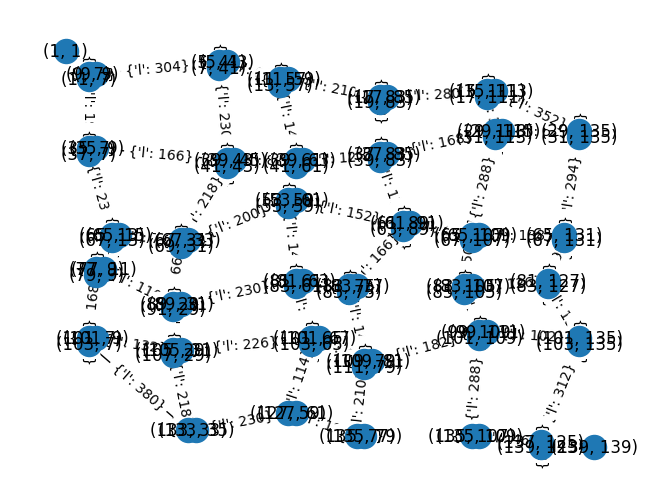

In [216]:
pos = {node: (node[1], -node[0]) for node in g.nodes()}
#nx.planar_layout(g)
nx.draw(g, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(g, pos=pos)

In [217]:
gm = nx.MultiDiGraph(g)

for node in list(gm.nodes()):
    if len(gm.in_edges(node)) == 1 and len(gm.out_edges(node)) == 1:
        gm.add_edge(list(gm.in_edges(node))[0][0], list(gm.out_edges(node))[0][1],
                    l=max(x['l'] for x in list(dict(gm[node]).values())[0].values()) + max(x['l'] for x in list(dict(gm.in_edges(node)).values())[0].values()))
        gm.remove_node(node)

TypeError: 'bool' object is not callable

{((1, 1), (5, 3)): Text(2.0, -3.0, "{'l': 14}"),
 ((5, 3), (13, 5)): Text(4.0, -9.0, "{'l': 20}"),
 ((5, 3), (3, 11)): Text(7.0, -4.0, "{'l': 20}"),
 ((13, 5), (19, 13)): Text(9.0, -16.0, "{'l': 36}"),
 ((13, 5), (13, 13)): Text(9.0, -13.0, "{'l': 10}"),
 ((3, 11), (13, 13)): Text(12.0, -8.0, "{'l': 22}"),
 ((3, 11), (11, 21)): Text(16.0, -7.0, "{'l': 28}"),
 ((13, 13), (19, 13)): Text(13.0, -16.0, "{'l': 8}"),
 ((13, 13), (11, 21)): Text(17.0, -12.0, "{'l': 16}"),
 ((19, 13), (19, 19)): Text(16.0, -19.0, "{'l': 8}"),
 ((11, 21), (19, 19)): Text(20.0, -15.0, "{'l': 8}"),
 ((19, 19), (21, 21)): Text(20.0, -20.0, "{'l': 2}")}

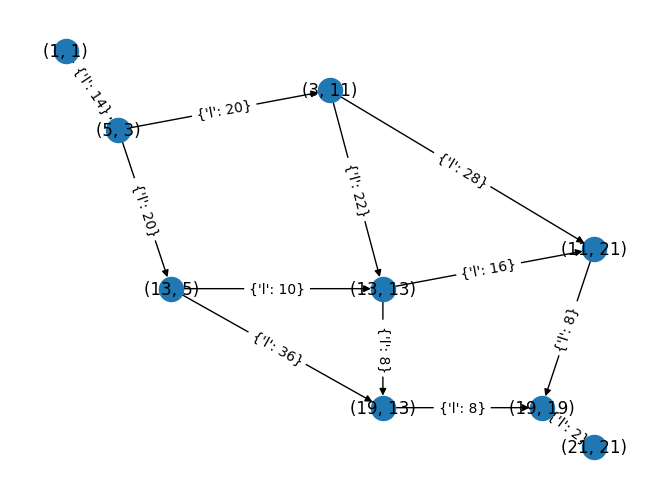

In [208]:
pos = {node: (node[1], -node[0]) for node in gm.nodes()}
#nx.planar_layout(g)
nx.draw(gm, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(gm, pos=pos)

In [218]:
vis_count = {
    n: len(g.in_edges(n))
    for n in g.nodes
}

dist = {
    n: 0
    for n in g.nodes
}

q = deque([(1, 1)])

while len(q):
    node = q.popleft()
    for target, data in g[node].items():
        print(data)
        dist[target] = max(dist[target], dist[node] + data['l'])
        vis_count[target] -= 1
        if vis_count[target] == 0:
            q.append(target)

dist[map.shape[0] - 2, map.shape[1] - 2] + 2

{'l': 46}
{'l': 2}
{'l': 2}
{'l': 196}
{'l': 304}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 238}
{'l': 166}
{'l': 230}
{'l': 92}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 82}
{'l': 74}
{'l': 218}
{'l': 88}
{'l': 146}
{'l': 210}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 168}
{'l': 110}
{'l': 66}
{'l': 200}
{'l': 78}
{'l': 122}
{'l': 280}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 380}
{'l': 132}
{'l': 74}
{'l': 230}
{'l': 140}
{'l': 152}
{'l': 172}
{'l': 168}
{'l': 30}
{'l': 352}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 218}
{'l': 226}
{'l': 82}
{'l': 50}
{'l': 166}
{'l': 48}
{'l': 288}
{'l': 52}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 230}
{'l': 114}
{'l': 44}
{'l': 144}
{'l': 50}
{'l': 138}
{'l': 294}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 2}
{'l': 128}
{'l': 210}
{'l': 182}
{'l': 66}
{'l': 126

2214

## Part 2

In [252]:
def mod_dfs2(map, start):
    dist = np.ones_like(map, dtype=int) * 99999
    source = np.zeros((*dist.shape, 2), dtype=int)
    g = nx.Graph()

    q = deque()
    q.append(start)
    dist[start] = 1
    source[start] = start
    while len(q):
        node = q.popleft()
        for dir in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            new_node = tuple(np.array(node) + np.array(dir))
            if (map[new_node] in ['.', invdirmap[dir]]) and ((source[node] != source[new_node]).all() or (dist[new_node]+1 != dist[node])):
                if dist[new_node] == 99999:
                    q.append(new_node)
                    dist[new_node] = dist[node] + 1
                if (
                        new_node == (map.shape[0] - 2, map.shape[1] - 2) or 
                        (map[new_node] == '.' and not any([map[tuple(np.array(new_node) + d)] == '.' for d in invdirmap.keys()]))
                ):
                    source[new_node] = new_node
                    if g.has_edge(tuple(source[node]), new_node):
                        print(tuple(source[node]), new_node)
                    g.add_edge(tuple(source[node]), new_node, l=dist[node] + 1 - dist[tuple(source[node])])
                else:
                    source[new_node] = source[node]                    

    return dist, g


dist, g = mod_dfs2(map, start)

{((1, 1), (9, 7)): Text(4.0, -5.0, "{'l': 46}"),
 ((9, 7), (35, 7)): Text(7.0, -22.0, "{'l': 198}"),
 ((9, 7), (5, 41)): Text(24.0, -7.0, "{'l': 306}"),
 ((35, 7), (39, 43)): Text(25.0, -37.0, "{'l': 168}"),
 ((35, 7), (65, 13)): Text(10.0, -50.0, "{'l': 240}"),
 ((5, 41), (11, 57)): Text(49.0, -8.0, "{'l': 94}"),
 ((5, 41), (39, 43)): Text(42.0, -22.0, "{'l': 232}"),
 ((39, 43), (39, 61)): Text(52.0, -39.0, "{'l': 90}"),
 ((39, 43), (67, 31)): Text(37.0, -53.0, "{'l': 220}"),
 ((11, 57), (39, 61)): Text(59.0, -25.0, "{'l': 148}"),
 ((11, 57), (17, 83)): Text(70.0, -14.0, "{'l': 212}"),
 ((65, 13), (67, 31)): Text(22.0, -66.0, "{'l': 76}"),
 ((65, 13), (77, 9)): Text(11.0, -71.0, "{'l': 84}"),
 ((39, 61), (53, 59)): Text(60.0, -46.0, "{'l': 80}"),
 ((39, 61), (37, 83)): Text(72.0, -38.0, "{'l': 124}"),
 ((67, 31), (89, 29)): Text(30.0, -78.0, "{'l': 68}"),
 ((67, 31), (53, 59)): Text(45.0, -60.0, "{'l': 202}"),
 ((77, 9), (89, 29)): Text(19.0, -83.0, "{'l': 112}"),
 ((77, 9), (101, 7))

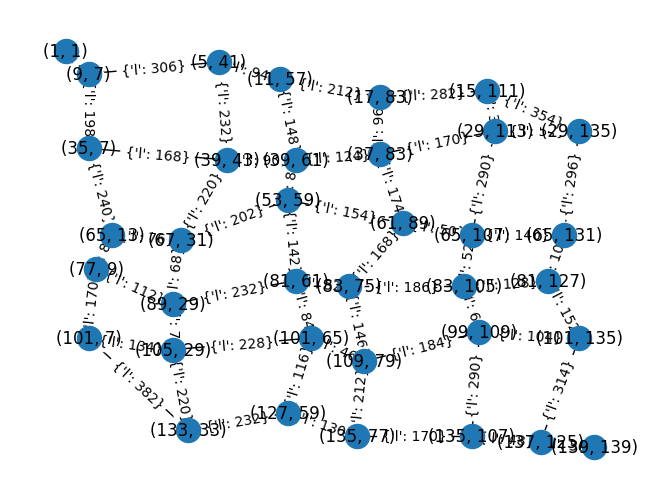

In [253]:
pos = {node: (node[1], -node[0]) for node in g.nodes()}
#nx.planar_layout(g)
nx.draw(g, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(g, pos=pos)

In [254]:
mx = 0
visited = {
    n: False
    for n in g.nodes()
}

def inv_dfs(node, dist):
    global mx
    if node == (map.shape[0]-2, map.shape[1]-2):
        mx = max(mx, dist)
        return
    visited[node] = True
    for target, data in g[node].items():
        if not visited[target]:
            inv_dfs(target, dist + data['l'])
            
    visited[node] = False

inv_dfs((1, 1), 0)
mx+2

6594

In [246]:
# too low
6342

6342